In [1]:
import numpy as np
import pandas as pd 
import os

import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

In [2]:
path = "dataset/face/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)

Total samples: 23708


In [3]:
import cv2
images = []
ages = []
genders = []
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )

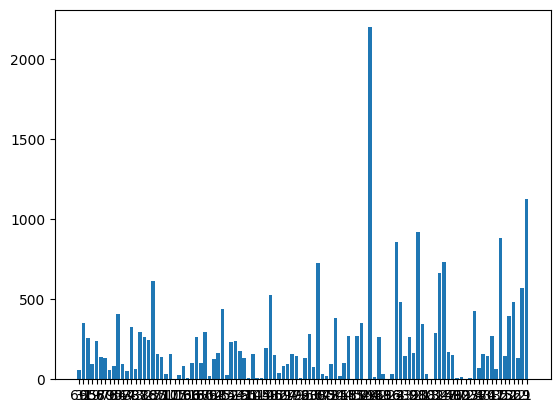

Max age: 99


In [4]:
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max age:",max(ages))

Gender: 1 Age: 100


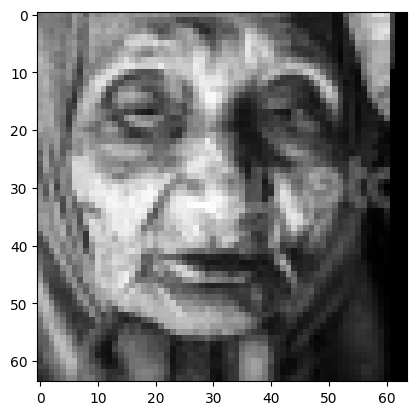

In [5]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 10
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

In [6]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

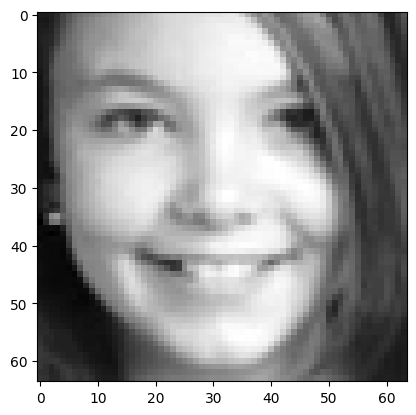

In [7]:
# pre processing
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [9]:
print("Shape of image:",sample.shape)

Shape of image: (64, 64, 1)


In [10]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [11]:
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 60, 60, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 30, 30, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

In [12]:
hist = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 100, batch_size=128,shuffle = True)

Epoch 1/100
149/149 [==============================] - 29s 139ms/step - loss: 0.7883 - dense_3_loss: 0.0954 - dense_9_loss: 0.6929 - dense_3_accuracy: 0.0152 - dense_9_accuracy: 0.5227 - val_loss: 0.7177 - val_dense_3_loss: 0.0312 - val_dense_9_loss: 0.6865 - val_dense_3_accuracy: 0.0249 - val_dense_9_accuracy: 0.5704
Epoch 2/100
149/149 [==============================] - 19s 124ms/step - loss: 0.6600 - dense_3_loss: 0.0470 - dense_9_loss: 0.6130 - dense_3_accuracy: 0.0219 - dense_9_accuracy: 0.6931 - val_loss: 0.4783 - val_dense_3_loss: 0.0277 - val_dense_9_loss: 0.4506 - val_dense_3_accuracy: 0.0245 - val_dense_9_accuracy: 0.8250
Epoch 3/100
149/149 [==============================] - 19s 125ms/step - loss: 0.5370 - dense_3_loss: 0.0399 - dense_9_loss: 0.4971 - dense_3_accuracy: 0.0230 - dense_9_accuracy: 0.7831 - val_loss: 0.4054 - val_dense_3_loss: 0.0257 - val_dense_9_loss: 0.3797 - val_dense_3_accuracy: 0.0245 - val_dense_9_accuracy: 0.8427
Epoch 4/100
149/149 [===================

In [13]:
model.save('ageGen.h5')

In [14]:
history = hist.history
print(history.keys())


dict_keys(['loss', 'dense_3_loss', 'dense_9_loss', 'dense_3_accuracy', 'dense_9_accuracy', 'val_loss', 'val_dense_3_loss', 'val_dense_9_loss', 'val_dense_3_accuracy', 'val_dense_9_accuracy'])


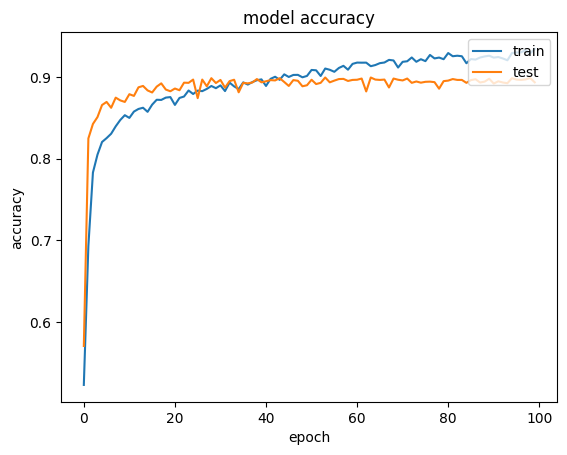

In [15]:
plt.plot(hist.history['dense_9_accuracy'])
plt.plot(hist.history['val_dense_9_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

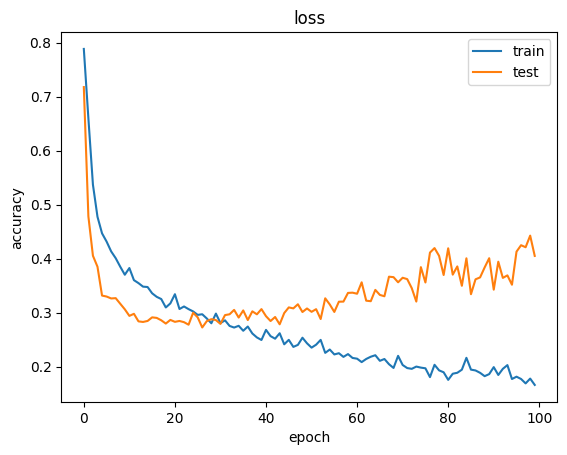

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

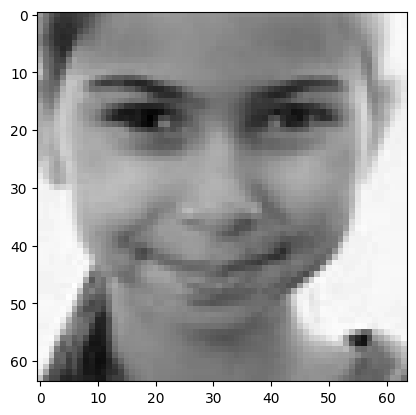

Actual Gender: Female Age: 11
1/1 [==============================] - 0s 49ms/step
Values: [array([[0.26542997]], dtype=float32), array([[0.99602973]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 0-18


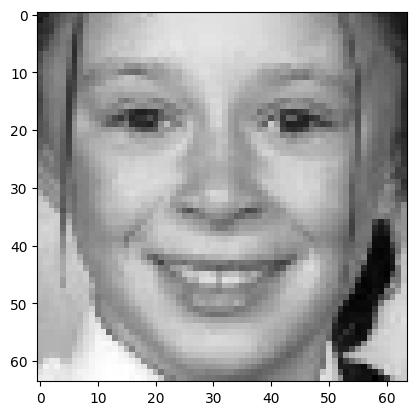

Actual Gender: Female Age: 13
1/1 [==============================] - 0s 43ms/step
Values: [array([[0.26651934]], dtype=float32), array([[0.95444214]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 0-18


In [21]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict(np.array([sample]))    
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)
    
    
indexes = [250,450]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)

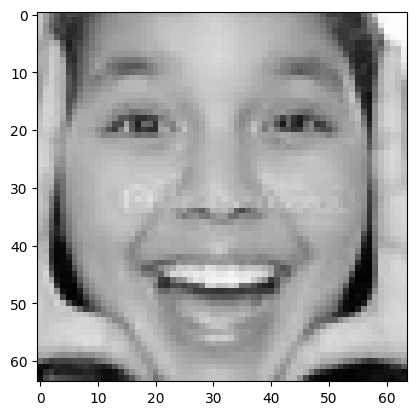

1/1 [==============================] - 0s 58ms/step
Values: [array([[0.26604486]], dtype=float32), array([[0.9687654]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 0-18


In [24]:
image1 = cv2.imread('own.jpg',0)
image1 = cv2.resize(image1,dsize=(64,64))
image1 = image.reshape((image1.shape[0],image.shape[1],1))
sample=image1
display(sample)
res = get_result(sample)